In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Criando as máquinas p/ redução de dimensão e clasificação

In [60]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [14]:
data_port = ??? # colocar dados dos portifolios
data_market = ??? # colocar dados do mercado

## 1. PCA para os portifolios

In [18]:
pca = PCA(0.95)
pca.fit(data_port.drop(columns='target'))
pca_port = pca.transform(data_port.drop(columns='target'))
pca_port.shape

Text(0, 0.5, 'PCA2')

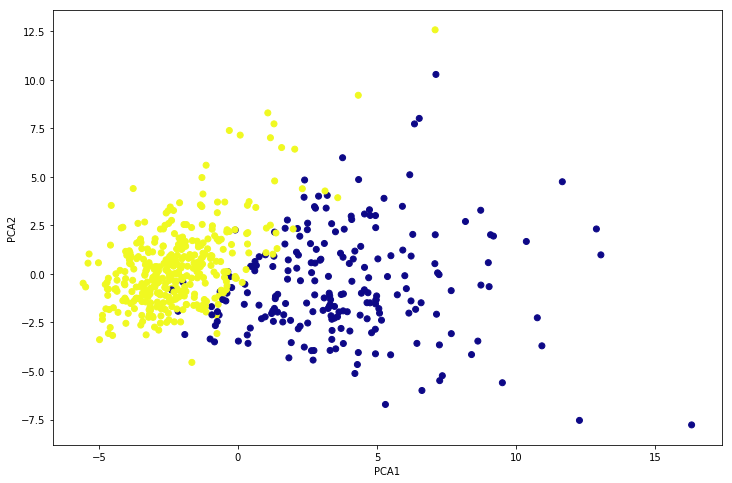

In [26]:
# colocar mais eixos para facilitar a vizualização [usar um for aqui]
plt.figure(figsize=(12,8))
plt.scatter(pca_port[:,0], pca_port[:,1], c=data_port['target'], cmap='plasma')
plt.xlabel('PCA1 (%.2f%%)' % (pca_port.explained_variance_ratio_[0]*100))
plt.ylabel('PCA2 (%.2f%%)' % (pca_port.explained_variance_ratio_[1]*100))

## 2. Kmeans de 40 clusters c/ data_portifolios - check n_clusters

In [ ]:
# Rodando o Kmeans com for para identificar o numero de clusters vs erro de classificação
X_train_test = pca_port #data_portifolios com dimensão reduzida
y_test = data_port['target']

In [ ]:
error_rate = []

for i in range(1,40):     # Levará algum tempo
    
    km1 = KMeans(n_clusters=i)
    km1.fit(X_train_test)
    pred_i = km1.predict(X_train_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Defini-se a quantidade de clusters: x

## 3. Redução dimensionalidade do Data_market (pca.transform)

In [ ]:
pca_market = pca.transform(data_market.drop(columns='target'))
pca_market.shape

Text(0, 0.5, 'PCA2')

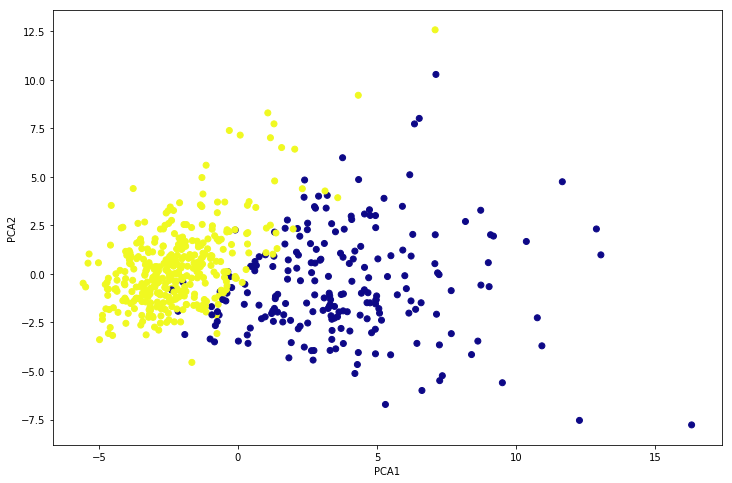

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(pca_market[:,0], pca_market[:,1], c=data_market['target'], cmap='plasma')
plt.xlabel('PCA1 (%.2f%%)' % (pca_port.explained_variance_ratio_[0]*100))
plt.ylabel('PCA2 (%.2f%%)' % (pca_port.explained_variance_ratio_[1]*100))

## 4. Kmeans com x clusters para solução final

In [2]:
# Escolhe-se o numero de Cluster e roda-se novamente o Kmeans para operação com o data_market

In [70]:
km2 = KMeans(n_clusters=??)

In [ ]:
km2.fit(pca_port)

In [ ]:
km2.predict(pca_market)

In [ ]:
km2.cluster_centers_

In [69]:
km2.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(pca_market[:,0], pca_market[:,1], c=km2.labels_, cmap='plasma')
plt.set_title('KMeans')
plt.xlabel('PCA1 (%.2f%%)' )
plt.ylabel('PCA2 (%.2f%%)' )

In [ ]:
ax1.set_title('KMeans')
ax1.scatterplot(data[0][:,0], data[0][:,1],c=kmeans.labels_)

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Paired");

In [ ]:
# Criar o arquivo de leads